In [1]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing the Netflix Dataset

netflix = pd.read_csv('/Users/harsha/Downloads/DS CONTENT/Projects/Netflix Data Manipulation/Netflix Dataset.csv')

In [3]:
# Looking the dataset

netflix.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Looking the shape of dataset

netflix.shape

(7789, 11)

In [5]:
# Checking the information about the dataset

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


### Task 1- Is there any Duplicate Record in this Dataset? If yes, remove the duplicate records

In [6]:
# Checking for duplicate values

netflix.duplicated().sum()

2

There are two duplicate records in the dataset

In [7]:
netflix.drop_duplicates(inplace= True)

In [8]:
netflix.shape

(7787, 11)

### Task 2 - Is there any Null Value in Dataset? Show with Heatmap

In [9]:
# Showing the null value for every column

netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

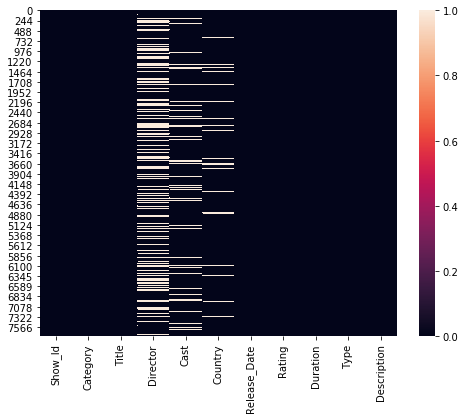

In [10]:
# Showing the null values with Heatmap

plt.figure(figsize= (8,6))
sns.heatmap(netflix.isnull())
plt.show()

### Task 3- For the 'House of Cards', find out 'Show Id' & 'Director' of the show

In [11]:
netflix[netflix.Title == 'House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [12]:
 netflix.loc[netflix['Show_Id'] == 's2833', 'Director'].values[0]

'Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson'

The Show_Id is s2833 & Director are 'Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson'

### Task 4- In which year highest number of TV shows & Movies were released? Show with Bar Graph

In [13]:
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'])

In [14]:
netflix['Release_Date'].dtype.name

'datetime64[ns]'

In [15]:
netflix['Year'] = netflix['Release_Date'].dt.year

In [16]:
netflix = netflix[netflix['Year'].notna()]

In [17]:
netflix['Year'].unique()

array([2020., 2016., 2018., 2017., 2019., 2021., 2015., 2013., 2011.,
       2012., 2014., 2008., 2009., 2010.])

In [18]:
netflix['Year'] = netflix['Year'].astype(int)

In [19]:
netflix['Year'].head(2)

0    2020
1    2016
Name: Year, dtype: int64

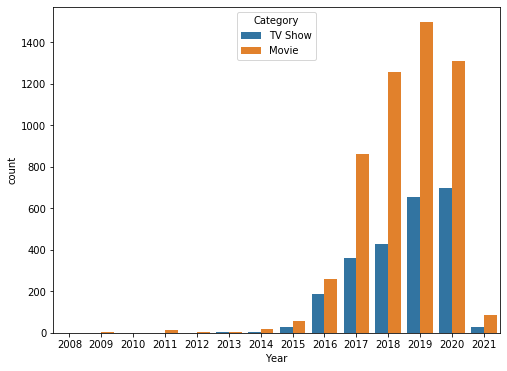

In [20]:
# Generating Bar plot

plt.figure(figsize=(8,6))
sns.countplot(x=netflix['Year'],hue=netflix['Category'])

plt.show()

Year 2019 has the highest number of Movies and  Year 2020 has highest number of TV Shows

### Task 5- Show all the Movies that were released in year 2019 and TV Shows in the year 2020

In [21]:
# Movies released in 2019

netflix[(netflix['Year'] == 2019) & (netflix['Category'] == 'Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,2019-03-01,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...,2019
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019
7775,s7774,Movie,Zoé: Panoramas,"Rodrigo Guardiola, Gabriel Cruz Rivas","Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...",Mexico,2019-11-01,TV-MA,89 min,"Documentaries, International Movies, Music & M...",This introspective rockumentary follows the ca...,2019
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019


In [22]:
# TV Shows released in 2020

netflix[(netflix['Year'] == 2020) & (netflix['Category'] == 'TV Show')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020
26,s27,TV Show,(Un)Well,NaN,NaN,United States,2020-08-12,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,2020
29,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020-04-17,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,2020
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,2020-12-07,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7740,s7739,TV Show,Young Wallander,NaN,"Adam Pålsson, Richard Dillane, Leanne Best, El...",United Kingdom,2020-09-03,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","An incendiary hate crime stirs civil unrest, f...",2020
7748,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,2020-04-25,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...,2020
7751,s7750,TV Show,Yu-Gi-Oh!,NaN,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,2020-07-08,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...,2020
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020


### Task 6- Show the Titles of all the TV Shows that were released in India only

In [23]:
netflix[(netflix['Category'] == 'TV Show') & (netflix['Country'] == 'India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

### Task 7- Show Top 10 Directors, who gave highest number of TV Shows & Movies to Netflix

In [24]:
netflix['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: Director, dtype: int64

### Task 8- Show all the records where 'Category' is Movie and 'Type' is Comedies or 'Country' is United Kingdom

In [25]:
netflix[((netflix['Category'] == 'Movie') & ((netflix['Type'] == 'Comedies') | (netflix['Country'] == 'United Kingdom')))] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...,2017
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020


### Task 9- In how many Movies and TV Shows, Tom Cruise was casted?

In [26]:
netflix = netflix[netflix['Cast'].notna()]

In [27]:
netflix[netflix['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


Two records have Tom Cruise as the Cast

### Task 10- How many Movies got the 'TV-14' rating in Canada?

In [28]:
netflix[(netflix['Category'] == 'Movie') & (netflix['Rating'] == 'TV-14') & (netflix['Country'] == 'Canada')]['Country'].value_counts().sum()

9

9 Movies got the TV-14 rating in Canada

### Task 11- How many TV Shows got the 'R' rating, after year 2018?

In [29]:
netflix[(netflix['Category'] == 'TV Show') & (netflix['Rating'] == 'R') & (netflix['Year'] < 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016-12-10,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016


Only one TV Show has rating R after year 2018

### Task 12- What is the maximum duration of a Movie/ Show on Netflix?

In [30]:
# Creating a new column to contain the duration in int datatype

netflix['Runtime'] = netflix['Duration'].apply(lambda x: x.split(' ')[0])

In [31]:
netflix['Runtime'] = netflix['Runtime'].astype(int)

In [32]:
netflix_runtime = netflix[['Runtime']].sort_values(by= 'Runtime', ascending = False)

In [33]:
netflix_runtime.head(3)

,Runtime
957,312
6852,253
4490,237


Maximum Duration for a Movie/Show is 312 minutes.

### Task 13- Plot top 5 Movies with Highest Runtime

In [34]:
movie = netflix[netflix['Category']== 'Movie']

In [35]:
top_5 = movie[['Title', 'Runtime']].sort_values(by= 'Runtime', ascending = False).head()

<Figure size 1440x432 with 0 Axes>

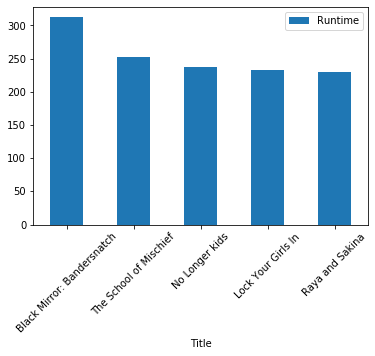

In [36]:
# Generating Bar plot

plt.figure(figsize=(20,6))
top_5.plot.bar(x='Title', y='Runtime',rot=45)

### Task 14- Which individual country has the Highest Number of TV Shows?

In [37]:
tv_show = netflix[netflix['Category'] == 'TV Show']

In [38]:
tv_show.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Runtime
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,4


In [39]:
tv_show['Country'].value_counts().head()

United States     575
United Kingdom    168
Japan             154
South Korea       145
Taiwan             68
Name: Country, dtype: int64

The United States has Highest Number of TV Shows, i.e. 575

### Task 15- How can we sort the dataset by Year?

In [40]:
netflix.sort_values(by = 'Year', ascending = False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Runtime
2505,s2506,Movie,Gothika,Mathieu Kassovitz,"Halle Berry, Robert Downey Jr., Charles S. Dut...","United States, France, Canada, Spain",2021-01-01,R,98 min,"Horror Movies, Thrillers","After a car crash, a criminal psychiatrist awa...",2021,98
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021,108
3558,s3559,Movie,Leap!,"Eric Summer, Éric Warin","Bronwen Mantel, Mel Brooks, Maddie Ziegler, Da...","France, Canada",2021-01-07,PG,89 min,"Children & Family Movies, Comedies","Félicie and Victor, two young friends in 1880s...",2021,89
3544,s3545,TV Show,Last Tango in Halifax,Juliet May,"Derek Jacobi, Anne Reid, Sarah Lancashire, Nic...",United Kingdom,2021-01-12,TV-MA,4 Seasons,"British TV Shows, Romantic TV Shows, TV Dramas",Two widowed childhood sweethearts fall for eac...,2021,4
6502,s6501,Movie,The Intouchables,"Olivier Nakache, Éric Toledano","François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",France,2021-01-11,R,112 min,"Comedies, Dramas, International Movies","In need of a caregiver, a wealthy aristocrat w...",2021,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,95
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,84
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,29
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,104


### Task 16- Find all the records where Category is Movie and Type is Dramas or Category is TV Show and Type is Kid's TV

In [41]:
netflix[((netflix['Category'] == 'Movie') & (netflix['Type'] == 'Dramas')) | ((netflix['Category'] == 'TV Show') & (netflix['Type'] == "Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Runtime
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,123
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019,119
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020,2
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019,110
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017,2
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018,1
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018,1
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019,2


There are 299 records where Category is Movie and Type is Dramas or Category is TV Show and Type is Kid's TV